#Heart Disease Detection


Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import make_scorer, accuracy_score
from keras.layers import Dense
from sklearn.model_selection import ParameterGrid

Importing Dataset:

In [ ]:
dataset = pd.read_csv('/content/Ai_project/hungarian_data.csv', header=None)
print(dataset)

     0   1   2    3    4  5  6    7  8    9  10 11 12  13
0    28   1   2  130  132  0  2  185  0  0.0  ?  ?  ?   0
1    29   1   2  120  243  0  0  160  0  0.0  ?  ?  ?   0
2    29   1   2  140    ?  0  0  170  0  0.0  ?  ?  ?   0
3    30   0   1  170  237  0  1  170  0  0.0  ?  ?  6   0
4    31   0   2  100  219  0  1  150  0  0.0  ?  ?  ?   0
..   ..  ..  ..  ...  ... .. ..  ... ..  ... .. .. ..  ..
289  52   1   4  160  331  0  0   94  1  2.5  ?  ?  ?   1
290  54   0   3  130  294  0  1  100  1  0.0  2  ?  ?   1
291  56   1   4  155  342  1  0  150  1  3.0  2  ?  ?   1
292  58   0   2  180  393  0  0  110  1  1.0  2  ?  7   1
293  65   1   4  130  275  0  1  115  1  1.0  2  ?  ?   1

[294 rows x 14 columns]


Cleaning and Processing Data:

In [ ]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
dataset.columns = column_names
#replacing unknown values '?' with NULL(NaN) values
dataset.replace('?', pd.NA, inplace=True)
#making all values numeric
dataset = dataset.apply(pd.to_numeric, errors='ignore')
print(dataset)

     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1     29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2     29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3     30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4     31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
289   52    1   4     160.0  331.0  0.0      0.0     94.0    1.0      2.5   
290   54    0   3     130.0  294.0  0.0      1.0    100.0    1.0      0.0   
291   56    1   4     155.0  342.0  1.0      0.0    150.0    1.0      3.0   
292   58    0   2     180.0  393.0  0.0      0.0    110.0    1.0      1.0   
293   65    1   4     130.0  275.0  0.0      1.0    115.0    1.0      1.0   

     slope  ca  thal  num  
0      NaN NaN   NaN    0  
1      NaN NaN   Na

Naive Bayes:

In [ ]:
#the target
X = dataset.drop('num', axis=1)
#the data
y = dataset['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#insert the mean of all values in the same column into the unknown feild
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#train the model
model = GaussianNB()
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)



Accuracy: 0.8378378378378378
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        44
           1       0.82      0.77      0.79        30

    accuracy                           0.84        74
   macro avg       0.83      0.83      0.83        74
weighted avg       0.84      0.84      0.84        74



Graph representation (ROC curve):

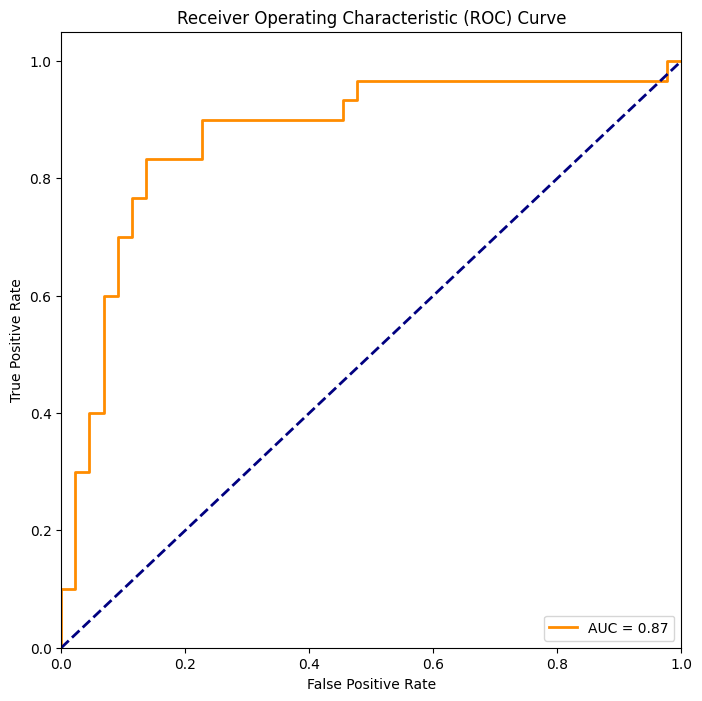

In [ ]:
y_probs = model.predict_proba(X_test_imputed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Neural Network:

In [ ]:
#the target
X = dataset.drop('num', axis=1)
#the data
y = dataset['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#insert the mean of all values in the same column into the unknown feild
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

#train the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_imputed.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_imputed, y_train, epochs=20, batch_size=32, validation_data=(X_test_imputed, y_test))

test_loss, test_accuracy = model.evaluate(X_test_imputed, y_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/20
7/7 [==============================] - 1s 31ms/step - loss: 20.0681 - accuracy: 0.6545 - val_loss: 14.5867 - val_accuracy: 0.5946
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 6.9057 - accuracy: 0.6455 - val_loss: 2.6577 - val_accuracy: 0.3919
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 3.1235 - accuracy: 0.4273 - val_loss: 3.3255 - val_accuracy: 0.4054
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 2.1901 - accuracy: 0.3909 - val_loss: 1.6581 - val_accuracy: 0.6081
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 1.4145 - accuracy: 0.6545 - val_loss: 0.8524 - val_accuracy: 0.6081
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.7164 - accuracy: 0.6636 - val_loss: 0.9147 - val_accuracy: 0.5676
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.8014 - accuracy: 0.6636 - val_loss: 0.8457 - val_accuracy: 0.6486
Epoch 8/20
7/7 [============

Confusion Matrix:

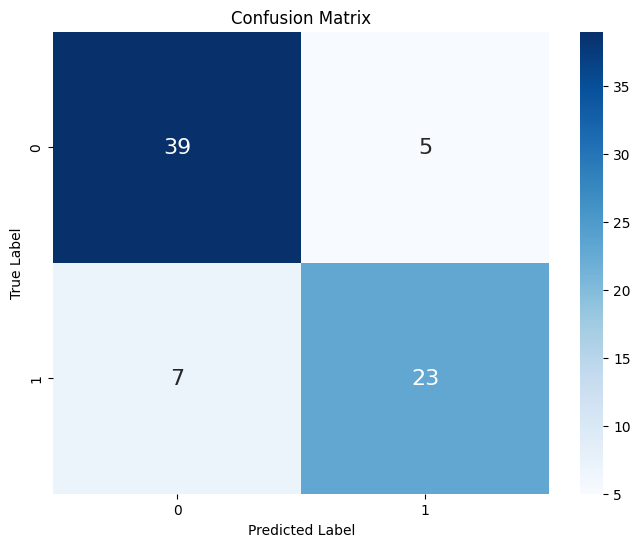

In [ ]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Hyperparameter tuning:

In [ ]:
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'sigmoid'],
    'hidden_units': [32, 64, 128],
    'batch_size': [32, 64, 128],
    'epochs': [10, 15, 20]
}

best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    model = keras.Sequential([
        layers.Dense(64, activation=params['activation'], input_shape=(X_train_imputed.shape[1],)),
        layers.Dense(params['hidden_units'], activation=params['activation']),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=params['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_imputed, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_imputed, y_test, verbose=0)

    # Check if the current model is the best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_params = params

# Print the best parameters and accuracy
print("Best parameters found: ", best_params)
print("Best accuracy found: ", best_accuracy)

Best parameters found:  {'activation': 'relu', 'batch_size': 32, 'epochs': 20, 'hidden_units': 32, 'optimizer': 'adam'}
Best accuracy found:  0.7432432174682617


Graph representation (ROC curve):

3/3 [==============================] - 0s 4ms/step


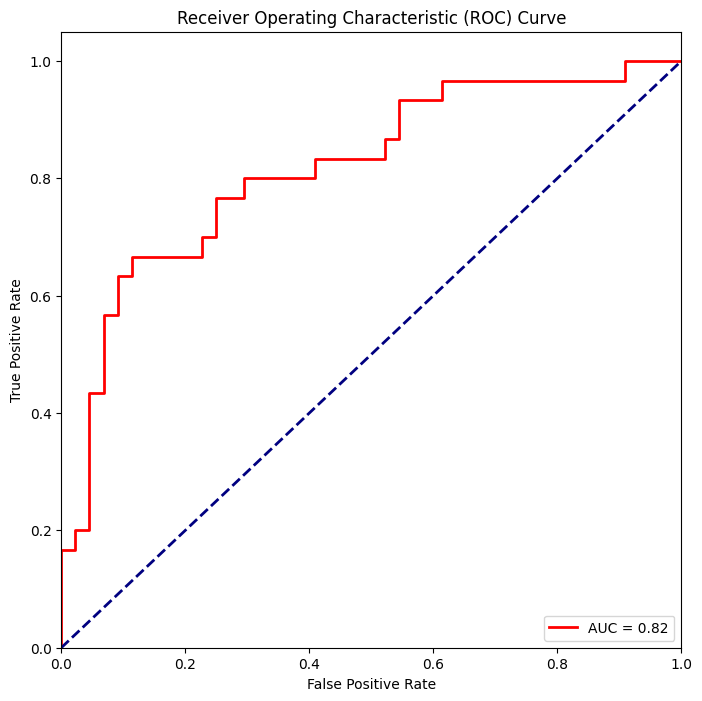

In [ ]:
y_probs = model.predict(X_test_imputed).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Difference in accuracy between Naive Bayes and Neural Network:

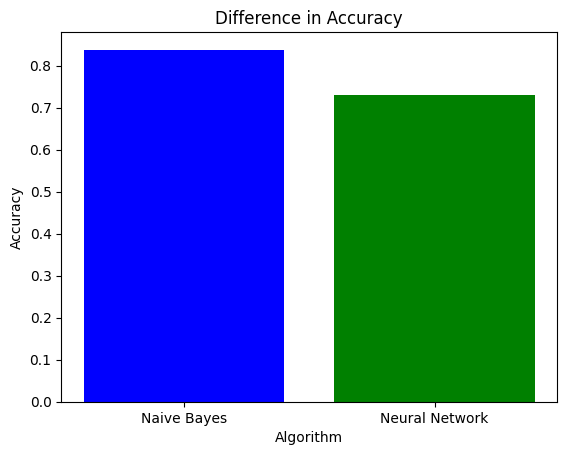

In [ ]:
plt.bar(['Naive Bayes'], [accuracy], color=['blue'])
plt.bar(['Neural Network'], [test_accuracy], color=['green'])

plt.title('Difference in Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

plt.show()